In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import math
from matplotlib.animation import FuncAnimation

# Successful trials  

1000 bodies: ./treecode in=treecode_in.txt out=treecode_out.txt dtime=3.512e-4 eps=0.001 theta=0.1 tstop=1 dtout=3.512e-3
with $\textbf{no}$ repetition  
4096 bodies: ./treecode in=treecode_in.txt out=treecode_out4096.txt dtime=3.471e-4 eps=0.001 theta=0.1 tstop=0.05 dtout=0.00017
with $\textbf{one}$ repetition  
5000 bodies: ./treecode in=treecode_in.txt out=treecode_out5000N.txt dtime=0.00035 eps=0.001 theta=0.1 tstop=0.5 dtout=0.0017
with $\textbf{no}$ repetition  
5000 bodies: ./treecode in=treecode_in.txt out=treecode_out5000N.txt dtime=0.00035 eps=0.1 theta=0.1 tstop=0.5 dtout=0.0017

In [7]:
N = 5000
tstop = 25 # collapse time
dtime = 0.1 # integration time
dtout = 1 # step output time
epsilon = 0.03

#n_outputs = math.floor(tstop / dtout)
#n_outputs = 52
#print(n_outputs)

# brute force 
n_outputs = 0

with open("treecode_out5000N.txt", "r") as file:
    for line in file:
        if line.strip() == str(N):
            n_outputs += 1
            
print(n_outputs) 

295


In [8]:
# Reading masses from the output

#data_mass = np.empty(N*n_outputs)
data_mass = []

with open("treecode_out5000N.txt", "r") as file:
    index = 0
    for _ in range(n_outputs):
        for i in range(3):
            file.readline()
        
        data_iter_m = np.genfromtxt(file, max_rows=N)
        data_mass[index:index+N] = data_iter_m
        index += N
        
        for _ in range(2*N):
            file.readline()
            

In [9]:
# Reading coordinates and velocities from the output

data_coordinates = []
data_velocities = []

with open("treecode_out5000N.txt", "r") as file:
    for _ in range(n_outputs):
        for _ in range(3+N):
            file.readline()
            
        data_iter_c = np.genfromtxt(file, usecols = range(0,3), delimiter = '', max_rows=N)
        data_coordinates.append(data_iter_c)
        data_iter_v = np.genfromtxt(file, usecols = range(0,3), delimiter = '', max_rows=N)
        data_velocities.append(data_iter_v)
        
data_coordinates = np.concatenate(data_coordinates)
data_velocities = np.concatenate(data_velocities)

In [10]:
x = np.zeros(shape = len(data_coordinates))
y = np.zeros(shape = len(data_coordinates))
z = np.zeros(shape = len(data_coordinates))

vx = np.zeros(shape = len(data_velocities))
vy = np.zeros(shape = len(data_velocities))
vz = np.zeros(shape = len(data_velocities))

for i in range(len(data_coordinates)):
    x[i] = data_coordinates[i][0]
    y[i] = data_coordinates[i][1]
    z[i] = data_coordinates[i][2]
    
for i in range(len(data_velocities)):
    vx[i] = data_velocities[i][0]
    vy[i] = data_velocities[i][1]
    vz[i] = data_velocities[i][2]

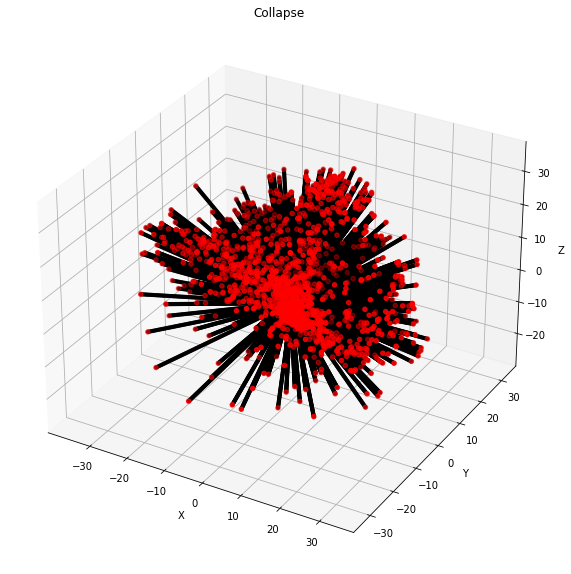

In [13]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.scatter(x, y, z, color='black', s=10)
#ax.scatter(x[:N], y[:N], z[:N], color='blue')
ax.scatter(x[-N:], y[-N:], z[-N:], color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Collapse')
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


KeyboardInterrupt: 

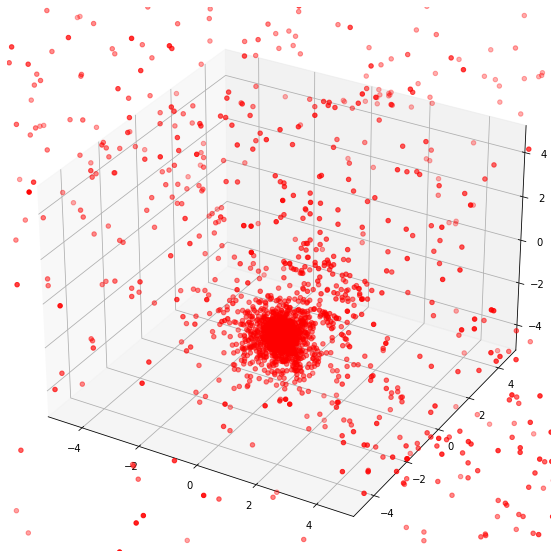

In [14]:
num_frames = len(data_coordinates) // N

def update(frame):
    start_idx = frame * N
    end_idx = (frame + 1) * N
    scat._offsets3d = (x[start_idx:end_idx], y[start_idx:end_idx], z[start_idx:end_idx])
    return scat,

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

scat = ax.scatter(x[:len(data_coordinates)], y[:len(data_coordinates)], z[:len(data_coordinates)], c='r', marker='o')

#ax.set_xlim(np.min(x), np.max(x))
#ax.set_ylim(np.min(y), np.max(y))
#ax.set_zlim(np.min(z), np.max(z))

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

ani = FuncAnimation(fig, update, frames=num_frames, interval=200)
ani.save('5000bodies.gif', writer='imagemagick', fps=10)

plt.show()

Text(0, 0.5, 'j-particle position')

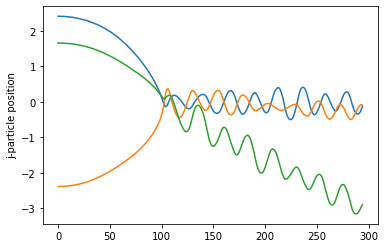

In [11]:
xp = np.zeros(shape=n_outputs)
yp = np.zeros(shape=n_outputs)
zp = np.zeros(shape=n_outputs)

for i in range(n_outputs):
    xp[i] = x[150+i*N]
    yp[i] = y[150+i*N]
    zp[i] = z[150+i*N]
    
plt.plot(xp)
plt.plot(yp)
plt.plot(zp)
plt.ylabel('j-particle position')

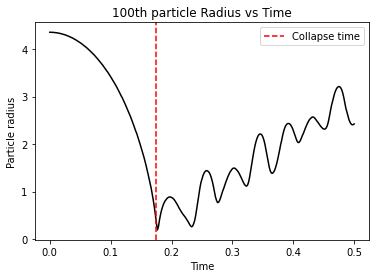

In [12]:
r_p1 = np.zeros(n_outputs)
for i in range(n_outputs):
    r_p1[i] = np.sqrt(x[100+i*N]**2 + y[100+i*N]**2 + z[100+i*N]**2)

time = np.linspace(0, 0.5, len(r_p1))
plt.plot(time, r_p1, color='black')
plt.axvline(0.175, color='red', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Particle radius')
plt.title('100th particle Radius vs Time')
plt.legend()
plt.show()

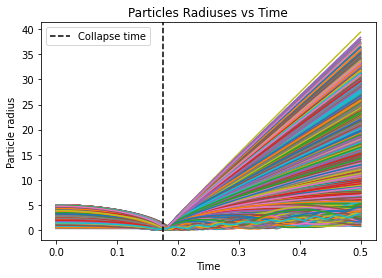

In [13]:
r_ptot = []
for j in range(N):
    r_p = np.zeros(n_outputs)
    
    for i in range(n_outputs):
        r_p[i] = np.sqrt(x[j+i*N]**2 + y[j+i*N]**2 + z[j+i*N]**2)
    r_ptot.append(r_p)

time = np.linspace(0, 0.5, n_outputs)
for i in range(N):
    plt.plot(time, r_ptot[i])
plt.axvline(0.175, color='black', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Particle radius')
plt.title('Particles Radiuses vs Time')
plt.legend()
plt.show()

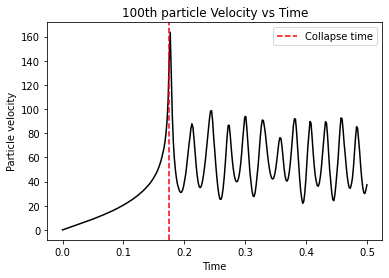

In [14]:
v_p1 = np.zeros(n_outputs)
for i in range(n_outputs):
    v_p1[i] = np.sqrt(vx[100+i*N]**2 + vy[100+i*N]**2 + vz[100+i*N]**2)
    
time = np.linspace(0, 0.5, len(v_p1))
plt.plot(time, v_p1, color='black')
plt.axvline(0.175, color='red', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Particle velocity')
plt.title('100th particle Velocity vs Time')
plt.legend()
plt.show()

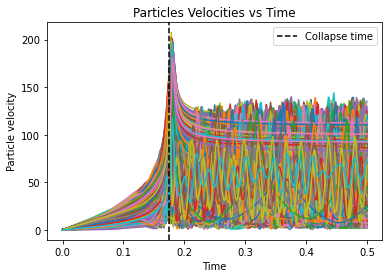

In [15]:
v_ptot = []
for j in range(N):
    v_p = np.zeros(n_outputs)
    
    for i in range(n_outputs):
        v_p[i] = np.sqrt(vx[j+i*N]**2 + vy[j+i*N]**2 + vz[j+i*N]**2)
    
    #r_p.sort()
    #r_p = r_p[::-1]
    v_ptot.append(v_p)

time = np.linspace(0, 0.5, n_outputs)
for i in range(N):
    plt.plot(time, v_ptot[i])
plt.axvline(0.175, color='black', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Particle velocity')
plt.title('Particles Velocities vs Time')
plt.legend()
plt.show()

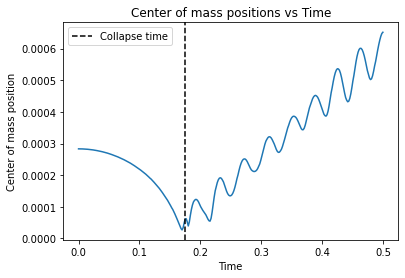

In [29]:
# Center of mass' motion
r_com = []
for j in range(N):
    r_com_ndx = np.zeros(n_outputs)
    
    for i in range(n_outputs):
        r_com_ndx[i] += r_p[i]*m / (m*N)
    
    r_com.append(r_com_ndx)

time = np.linspace(0, 0.5, n_outputs)
#for i in range(N):
    #plt.plot(time, r_com[i])
plt.plot(time, r_com[0])
plt.axvline(0.175, color='black', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Center of mass position')
plt.title('Center of mass positions vs Time')
plt.legend()
plt.show()